In [ ]:
# **Setup: Generate Dummy DataFrames in Memory**
# %%
import pandas as pd
import numpy as np
import os # Keep os just in case, although we won't create files for analysis
import matplotlib.pyplot as plt
import seaborn as sns

print("Generating dummy features DataFrame in memory...")
# Generate dummy features data directly into a DataFrame
df_features = pd.DataFrame({
    'feature_0': np.random.rand(100),
    'feature_1': np.random.randn(100),
    'feature_2': np.random.randint(0, 10, 100).astype(float),
    'feature_3': np.random.choice([1.0, 2.0, 3.0, np.nan], 100),
    'feature_4': [f'category_{i % 3}' for i in range(100)],
    'feature_5': np.random.uniform(-10, 10, 100)
})

df_features['feature_constant'] = 5.0
df_features['feature_single_value'] = np.nan
# Ensure at least one non-NaN value for single_value column
if len(df_features) > 0:
    df_features.loc[0, 'feature_single_value'] = 10.0
df_features['feature_with_nans'] = np.random.choice([np.nan, 0.1, 0.5, 0.9], 100, p=[0.5, 0.2, 0.2, 0.1])

print("Dummy features DataFrame generated.")
print("\nGenerating dummy sample submission DataFrame in memory...")

# Generate dummy sample submission data directly into a DataFrame
df_submission = pd.DataFrame({
    'id': np.arange(1000), # Dummy IDs
    'action': np.random.randint(0, 2, 1000) # Dummy actions (0 or 1)
})

print("Dummy sample submission DataFrame generated.")

Generating dummy features DataFrame in memory...
Dummy features DataFrame generated.

Generating dummy sample submission DataFrame in memory...
Dummy sample submission DataFrame generated.



--- Analyzing Dummy Features DataFrame ---
Dataset Shape: (100, 9)
Column Types Overview:
float64    8
object     1
Name: count, dtype: int64

First Few Rows of the Dataset:
   feature_0  feature_1  feature_2  feature_3   feature_4  feature_5  \
0   0.214498   0.276111        2.0        3.0  category_0   4.970504   
1   0.931722  -0.308871        6.0        1.0  category_1  -9.324528   
2   0.028473   1.090598        9.0        NaN  category_2  -3.420224   
3   0.545090  -0.677776        3.0        2.0  category_0   6.655198   
4   0.688427   0.234600        4.0        1.0  category_1   4.884230   

   feature_constant  feature_single_value  feature_with_nans  
0               5.0                  10.0                NaN  
1               5.0                   NaN                NaN  
2               5.0                   NaN                0.9  
3               5.0                   NaN                NaN  
4               5.0                   NaN                NaN  

Missing Value

<ipython-input-9-8106b6b41d3d>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_features[col].fillna(median_val, inplace=True) # Use inplace=True or reassign


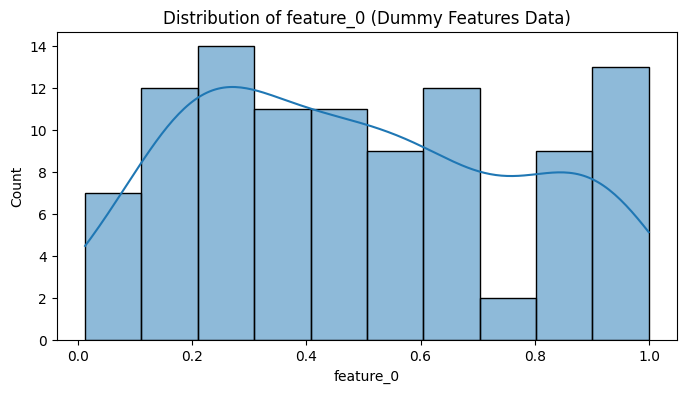

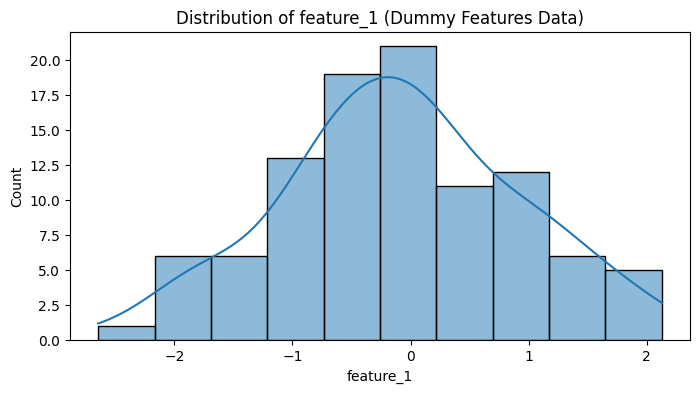

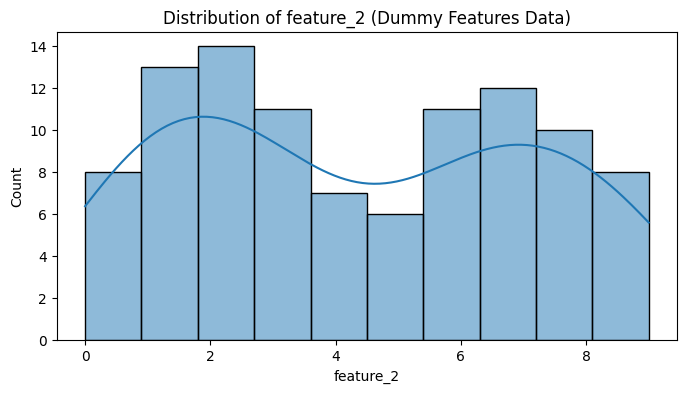

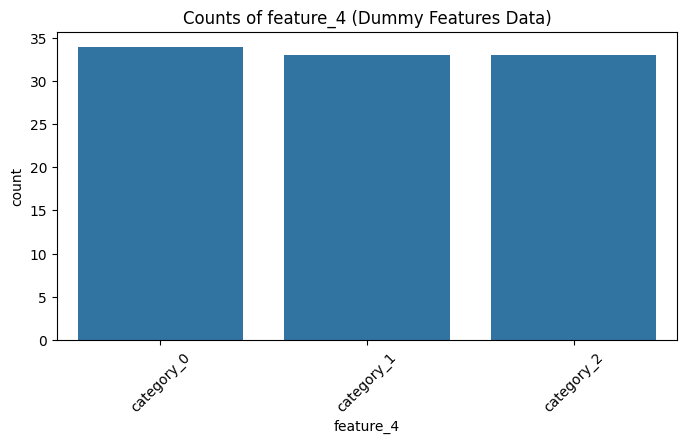


Calculating Correlation Matrix...


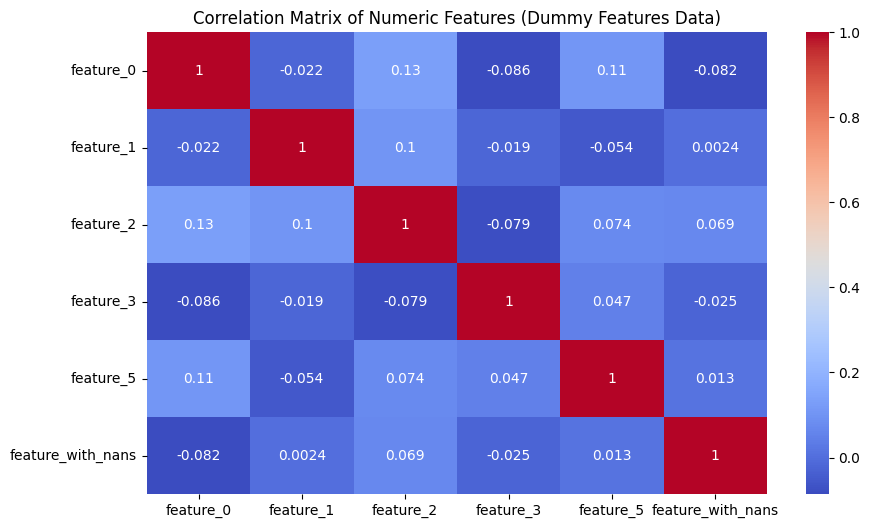

In [ ]:
# **Analysis: Dummy Features DataFrame**
# %%
# Use the in-memory dummy features DataFrame directly
# Check if the DataFrame was successfully generated (though highly likely with this method)
if not df_features.empty:
    print("\n--- Analyzing Dummy Features DataFrame ---")

    # Inspect the dataset
    print("Dataset Shape:", df_features.shape)
    print("Column Types Overview:")
    print(df_features.dtypes.value_counts())
    print("\nFirst Few Rows of the Dataset:")
    print(df_features.head())
    print("\nMissing Values Per Column:")
    print(df_features.isnull().sum())

    # Identify numeric and categorical columns
    numeric_columns_features = df_features.select_dtypes(include=[np.number]).columns
    categorical_columns_features = df_features.select_dtypes(exclude=[np.number]).columns # Use exclude for non-numeric

    if not numeric_columns_features.empty:
        print("\nSummary of Numeric Columns:")
        print(df_features[numeric_columns_features].describe())

    if not categorical_columns_features.empty:
        print("\nSummary of Categorical Columns:")
        for col in categorical_columns_features:
            print(f"{col}: {df_features[col].nunique()} unique values")

    # Handle Missing Values (Imputation directly on the DataFrame)
    print("\nHandling missing values...")
    # Impute numeric NaNs with median
    if not numeric_columns_features.empty:
        for col in numeric_columns_features:
            if df_features[col].isnull().any():
                # Check if median is not NaN (meaning there's at least one non-NaN value)
                median_val = df_features[col].median()
                if pd.notna(median_val):
                    df_features[col].fillna(median_val, inplace=True) # Use inplace=True or reassign
                    # Reassignment: df_features[col] = df_features[col].fillna(median_val)
                else:
                    # If all values are NaN, median is NaN. Fill with 0 or another placeholder.
                     df_features[col].fillna(0, inplace=True) # Use inplace=True or reassign
                     # Reassignment: df_features[col] = df_features[col].fillna(0)
        print("Numeric NaNs imputed.")


    # Impute categorical NaNs with mode
    if not categorical_columns_features.empty:
        for col in categorical_columns_features:
            if df_features[col].isnull().any():
                 # mode() can return multiple values if tied, take the first one
                mode_val = df_features[col].mode()
                if not mode_val.empty:
                    df_features[col].fillna(mode_val[0], inplace=True) # Use inplace=True or reassign
                    # Reassignment: df_features[col] = df_features[col].fillna(mode_val[0])
        print("Categorical NaNs imputed.")
    else:
        print("No categorical columns to impute.")


    # Visualizations
    print("\nGenerating visualizations...")
    # Ensure seaborn and matplotlib are imported (done in the first cell)
    if not numeric_columns_features.empty:
        cols_to_plot = numeric_columns_features[:3] # Plot first few numeric columns
        for col in cols_to_plot:
            plt.figure(figsize=(8, 4))
            # Plotting after fillna, so dropna() might not be strictly necessary but doesn't hurt
            sns.histplot(df_features[col], kde=True, bins=10)
            plt.title(f"Distribution of {col} (Dummy Features Data)")
            plt.show()

    if not categorical_columns_features.empty:
        cols_to_plot = categorical_columns_features[:2] # Plot first few categorical columns
        for col in cols_to_plot:
            plt.figure(figsize=(8, 4))
            # Use the DataFrame variable directly
            sns.countplot(data=df_features, x=col, order=df_features[col].value_counts().index)
            plt.title(f"Counts of {col} (Dummy Features Data)")
            plt.xticks(rotation=45)
            plt.show()

    # Correlation Matrix (only on numeric columns with variance after imputation)
    print("\nCalculating Correlation Matrix...")
    # Recalculate numeric columns and check variance *after* imputation
    current_numeric_columns = df_features.select_dtypes(include=[np.number]).columns.tolist()
    valid_numeric_cols_for_corr = [col for col in current_numeric_columns if df_features[col].nunique() > 1]


    if len(valid_numeric_cols_for_corr) > 1:
        correlation_matrix = df_features[valid_numeric_cols_for_corr].corr()
        plt.figure(figsize=(10, 6))
        # Use annot=True only for small matrices
        if correlation_matrix.shape[0] <= 10:
             sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
        else:
             sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
        plt.title("Correlation Matrix of Numeric Features (Dummy Features Data)")
        plt.show()
    else:
        print("Not enough numeric columns with variance for correlation analysis (Dummy Features Data).")

else:
    print("Features DataFrame is empty after generation, skipping analysis steps.")


--- Analyzing Dummy Sample Submission DataFrame ---

Dataset Information (Dummy Sample Submission):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      1000 non-null   int64
 1   action  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB

First few rows (Dummy Sample Submission):
   id  action
0   0       0
1   1       0
2   2       1
3   3       1
4   4       1

Replaced inf/-inf with NaN in Sample Submission.

Summary of Numeric Columns (Dummy Sample Submission):
                id      action
count  1000.000000  1000.00000
mean    499.500000     0.50000
std     288.819436     0.50025
min       0.000000     0.00000
25%     249.750000     0.00000
50%     499.500000     0.50000
75%     749.250000     1.00000
max     999.000000     1.00000

Summary of Categorical Columns (Dummy Sample Submission):
No categorical columns found in the dummy sam

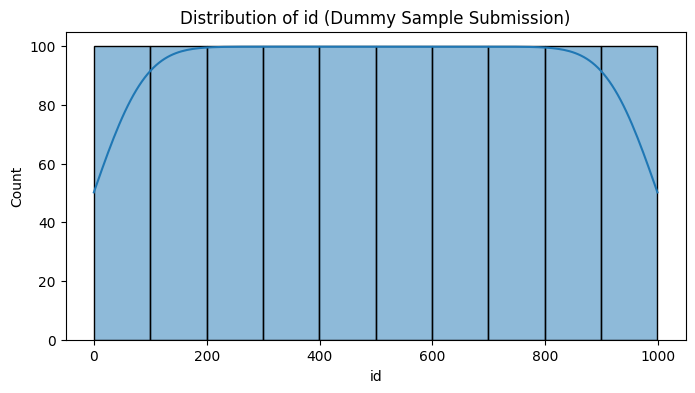

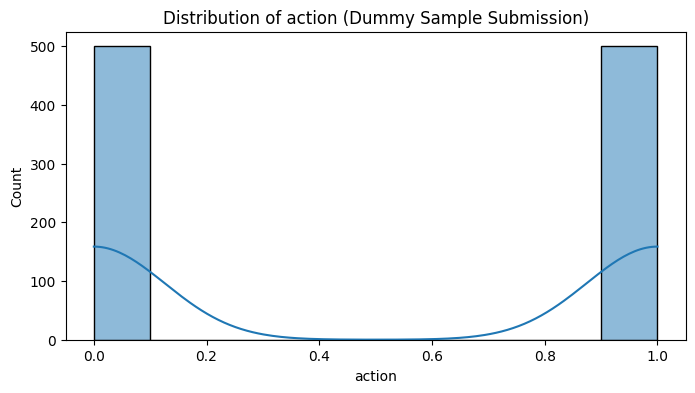

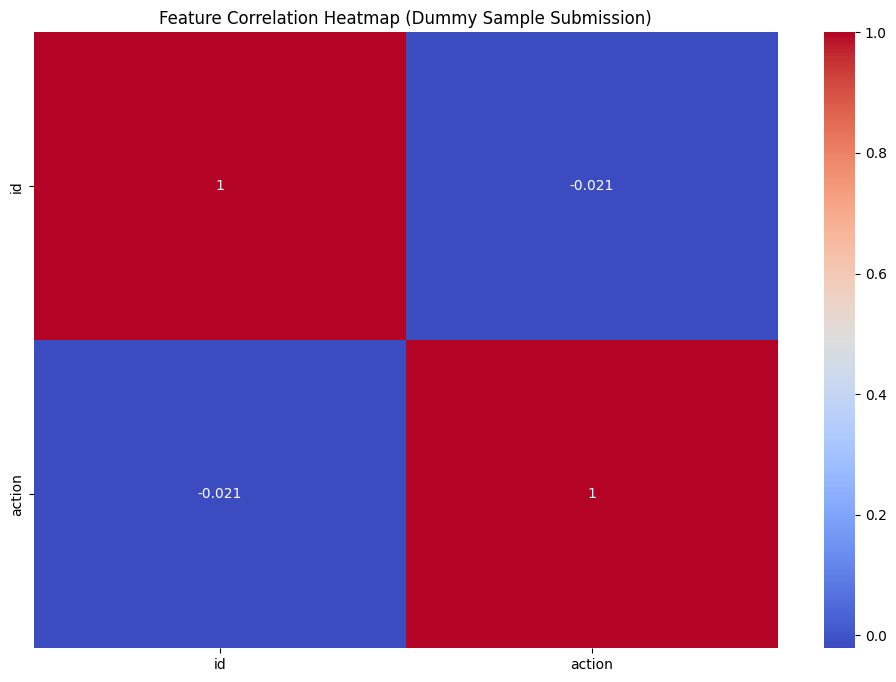

No categorical columns to visualize in dummy sample submission.

Dataset Shape (Dummy Sample Submission):
(1000, 2)

Unique Values in Each Column (Dummy Sample Submission):
id        1000
action       2
dtype: int64


In [ ]:
# **Analysis: Dummy Sample Submission DataFrame**
# %%
# Use the in-memory dummy sample submission DataFrame directly
# Check if the DataFrame was successfully generated
if not df_submission.empty:
    print("\n--- Analyzing Dummy Sample Submission DataFrame ---")
    # Display basic information
    print("\nDataset Information (Dummy Sample Submission):")
    df_submission.info()

    # Display first few rows
    print("\nFirst few rows (Dummy Sample Submission):")
    print(df_submission.head())

    # Replace inf and -inf values with NaN (less likely in dummy submission but included)
    # Perform this replacement directly on the DataFrame variable
    df_submission.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
    print("\nReplaced inf/-inf with NaN in Sample Submission.")

    # 1. Summary of numeric columns
    numeric_columns_sub = df_submission.select_dtypes(include=[np.number]).columns
    print("\nSummary of Numeric Columns (Dummy Sample Submission):")
    if not numeric_columns_sub.empty:
        print(df_submission[numeric_columns_sub].describe())
    else:
        print("No numeric columns found in the dummy sample submission dataset.")

    # 2. Summary of categorical columns
    categorical_columns_sub = df_submission.select_dtypes(exclude=[np.number]).columns # Use exclude for non-numeric
    print("\nSummary of Categorical Columns (Dummy Sample Submission):")
    if not categorical_columns_sub.empty:
        print(df_submission[categorical_columns_sub].describe())
    else:
        print("No categorical columns found in the dummy sample submission dataset.")

    # 3. Check for missing values
    print("\nMissing Values (Dummy Sample Submission):")
    print(df_submission.isnull().sum())

    # 4. Visualize the distribution of numeric columns
    print("\nGenerating visualizations...")
    if not numeric_columns_sub.empty:
        for col in numeric_columns_sub:
            plt.figure(figsize=(8, 4))
            sns.histplot(df_submission[col].dropna(), kde=True, bins=10) # Drop NaNs before plotting
            plt.title(f"Distribution of {col} (Dummy Sample Submission)")
            plt.show()
    else:
        print("No numeric columns to visualize in dummy sample submission.")

    # 5. Correlation analysis for numeric columns
    # Ensure we only consider numeric columns for variance calculation *after* any cleaning like inf replacement
    valid_numeric_cols_for_corr_sub = [col for col in df_submission.select_dtypes(include=[np.number]).columns if df_submission[col].nunique() > 1]


    if len(valid_numeric_cols_for_corr_sub) > 1:
        correlation_matrix_sub = df_submission[valid_numeric_cols_for_corr_sub].corr()
        plt.figure(figsize=(12, 8))
        # Use annot=True only if the matrix is small
        if len(valid_numeric_cols_for_corr_sub) <= 10:
             sns.heatmap(correlation_matrix_sub, cmap="coolwarm", annot=True)
        else:
             sns.heatmap(correlation_matrix_sub, cmap="coolwarm", annot=False)
        plt.title("Feature Correlation Heatmap (Dummy Sample Submission)")
        plt.show()
    else:
        print("Not enough numeric columns with variance for correlation analysis (Dummy Sample Submission).")

    # 6. Countplot for categorical columns (if any)
    if not categorical_columns_sub.empty:
        for col in categorical_columns_sub:
            plt.figure(figsize=(8, 4))
            sns.countplot(data=df_submission, x=col, palette="viridis")
            plt.title(f"Countplot of {col} (Dummy Sample Submission)")
            plt.xticks(rotation=45)
            plt.show()
    else:
        print("No categorical columns to visualize in dummy sample submission.")

    # Additional Insights
    print("\nDataset Shape (Dummy Sample Submission):")
    print(df_submission.shape)
    print("\nUnique Values in Each Column (Dummy Sample Submission):")
    print(df_submission.nunique())
else:
     print("Sample Submission DataFrame is empty after generation, skipping analysis steps.")

In [ ]:

# **Analysis: Dummy Features (Focus on Numeric Conversion & Variance)**
# %%
# Use the in-memory dummy features DataFrame directly again for this specific analysis section
# We might modify 'df_features' here, so this uses the potentially modified version from the previous cell
# If you needed a fresh copy, you'd regenerate it or copy it: df_features_copy = df_features.copy()
print("\n--- Analysis: Dummy Features (Focus on Numeric Conversion & Variance) ---")

if not df_features.empty:
    # Inspect the dataset (might show changes from imputation in previous cell)
    print("\nDataset Shape:", df_features.shape)
    print("Column Types Overview:")
    print(df_features.dtypes.value_counts())
    print("\nFirst Few Rows of the Dataset:")
    print(df_features.head())

    # Check for numeric columns
    # Get current types after imputation
    numeric_columns = df_features.select_dtypes(include=[np.number]).columns.tolist()
    non_numeric_columns = df_features.select_dtypes(exclude=[np.number]).columns.tolist()
    print(f"\nNumeric Columns: {numeric_columns}")
    print(f"Non-Numeric Columns: {non_numeric_columns}")

    # Attempt to convert non-numeric columns to numeric
    # This part is less relevant now as 'feature_4' is intentionally 'object'
    # but keeping it to match the original user logic.
    print("\nAttempting to convert non-numeric columns to numeric...")
    for col in non_numeric_columns:
        try:
            original_dtype = df_features[col].dtype
            # Apply conversion directly to the DataFrame variable
            df_features[col] = pd.to_numeric(df_features[col], errors='coerce')
            if df_features[col].dtype != original_dtype:
                 print(f"Successfully converted column {col} to numeric.")
            else:
                 if df_features[col].isnull().all():
                      print(f"Column {col} contained only values that coerced to NaN.")
                 else:
                       print(f"Column {col} could not be converted to numeric (or no change occurred).")

        except Exception as e:
            print(f"Could not convert column {col} to numeric. Error: {e}")

    # Re-check numeric columns after conversion attempt
    numeric_columns = df_features.select_dtypes(include=[np.number]).columns.tolist()
    non_numeric_columns = df_features.select_dtypes(exclude=[np.number]).columns.tolist()
    print(f"\nUpdated Numeric Columns: {numeric_columns}")
    print(f"Remaining Non-Numeric Columns: {non_numeric_columns}")


    # Check for columns with variance
    # Ensure we consider numeric columns after conversion attempt
    valid_numeric_columns = [col for col in numeric_columns if df_features[col].nunique() > 1]
    print(f"\nValid Numeric Columns (with variance): {valid_numeric_columns}")

    # If no valid numeric columns, inspect non-numeric data
    if not valid_numeric_columns:
        print("\nNo valid numeric columns with variance found. Investigating remaining non-numeric columns...")
        if not non_numeric_columns:
             print("No non-numeric columns remain.")
        else:
            print(df_features[non_numeric_columns].head())
    else:
        print("\nProceeding with analysis on valid numeric columns...")
        # Ensure there are enough columns for correlation
        if len(valid_numeric_columns) > 1:
            correlation_matrix = df_features[valid_numeric_columns].corr()
            print("\nCorrelation Matrix:")
            # Print only a part of the matrix if it's very large
            if correlation_matrix.shape[0] > 10:
                 print(correlation_matrix.head().T.head())
            else:
                 print(correlation_matrix)
        else:
            print("\nNot enough valid numeric columns for correlation matrix.")

else:
    print("Features DataFrame is empty, skipping analysis steps.")


--- Analysis: Dummy Features (Focus on Numeric Conversion & Variance) ---

Dataset Shape: (100, 9)
Column Types Overview:
float64    8
object     1
Name: count, dtype: int64

First Few Rows of the Dataset:
   feature_0  feature_1  feature_2  feature_3   feature_4  feature_5  \
0   0.214498   0.276111        2.0        3.0  category_0   4.970504   
1   0.931722  -0.308871        6.0        1.0  category_1  -9.324528   
2   0.028473   1.090598        9.0        2.0  category_2  -3.420224   
3   0.545090  -0.677776        3.0        2.0  category_0   6.655198   
4   0.688427   0.234600        4.0        1.0  category_1   4.884230   

   feature_constant  feature_single_value  feature_with_nans  
0               5.0                  10.0                0.5  
1               5.0                  10.0                0.5  
2               5.0                  10.0                0.9  
3               5.0                  10.0                0.5  
4               5.0                  10.0    

[*********************100%***********************]  1 of 1 completed



--- Random Forest ---
              precision    recall  f1-score   support

           0       0.43      0.99      0.60       109
           1       0.91      0.06      0.12       154

    accuracy                           0.45       263
   macro avg       0.67      0.53      0.36       263
weighted avg       0.71      0.45      0.32       263


--- XGBoost ---
              precision    recall  f1-score   support

           0       0.44      0.85      0.58       109
           1       0.68      0.22      0.33       154

    accuracy                           0.48       263
   macro avg       0.56      0.54      0.46       263
weighted avg       0.58      0.48      0.43       263



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:41:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.45      0.76      0.57       109
           1       0.67      0.34      0.45       154

    accuracy                           0.52       263
   macro avg       0.56      0.55      0.51       263
weighted avg       0.58      0.52      0.50       263



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

--- LSTM ---
              precision    recall  f1-score   support

           0       0.43      0.88      0.58       108
           1       0.69      0.19      0.30       153

    accuracy                           0.48       261
   macro avg       0.56      0.53      0.44       261
weighted avg       0.58      0.48      0.41       261



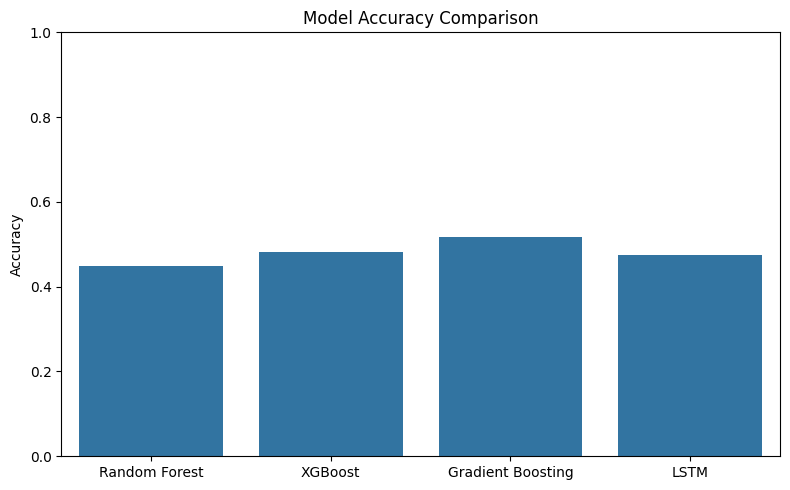

In [13]:
# !pip install yfinance scikit-learn matplotlib seaborn xgboost keras tensorflow ta imbalanced-learn
!pip install ta
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import ta  # Technical Analysis library

# Step 1: Download Data
stock_data = yf.download("AAPL", start="2020-01-01", end="2025-04-15")

# Step 2: Feature Engineering
stock_data['Return'] = stock_data['Close'].pct_change()
stock_data['Target'] = np.where(stock_data['Return'].shift(-1) > 0, 1, 0)

# Technical Indicators
stock_data['SMA_5'] = stock_data['Close'].rolling(window=5).mean()
# Ensure 'Close' is a Series by using .squeeze()
stock_data['RSI'] = ta.momentum.RSIIndicator(stock_data['Close'].squeeze()).rsi()
stock_data['MACD'] = ta.trend.MACD(stock_data['Close'].squeeze()).macd()
stock_data['Volatility'] = stock_data['Return'].rolling(window=5).std()

# Drop NaN values caused by indicators
stock_data.dropna(inplace=True)

# Step 3: Define Features and Labels
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Return', 'SMA_5', 'RSI', 'MACD', 'Volatility']
X = stock_data[features]
y = stock_data['Target']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 5: Balance with SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# -------------------------------
# Model 1: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("\n--- Random Forest ---")
print(classification_report(y_test, rf_pred))

# -------------------------------
# Model 2: XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_bal, y_train_bal)
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
print("\n--- XGBoost ---")
print(classification_report(y_test, xgb_pred))

# -------------------------------
# Model 3: Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train_bal, y_train_bal)
gb_pred = gb.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
print("\n--- Gradient Boosting ---")
print(classification_report(y_test, gb_pred))

# -------------------------------
# Model 4: LSTM

# Scale and reshape for LSTM
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_lstm, y_lstm = [], []
lookback = 10
for i in range(lookback, len(X_scaled)):
    X_lstm.append(X_scaled[i-lookback:i])
    y_lstm.append(y.iloc[i])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)
split_index = int(0.8 * len(X_lstm))
X_train_lstm, X_test_lstm = X_lstm[:split_index], X_lstm[split_index:]
y_train_lstm, y_test_lstm = y_lstm[:split_index], y_lstm[split_index:]

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=16, verbose=0)

lstm_pred = (model_lstm.predict(X_test_lstm) > 0.5).astype(int)
lstm_acc = accuracy_score(y_test_lstm, lstm_pred)
print("\n--- LSTM ---")
print(classification_report(y_test_lstm, lstm_pred))

# -------------------------------
# Accuracy Comparison Plot
models = ['Random Forest', 'XGBoost', 'Gradient Boosting', 'LSTM']
accuracies = [rf_acc, xgb_acc, gb_acc, lstm_acc]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()